## Data fetching

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r"C:\Users\BAB AL SAFA\Downloads\project1_df.csv")
df.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


## Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   TID                    55000 non-null  int64  
 2   Gender                 55000 non-null  object 
 3   Age Group              55000 non-null  object 
 4   Purchase Date          55000 non-null  object 
 5   Product Category       55000 non-null  object 
 6   Discount Availed       55000 non-null  object 
 7   Discount Name          27415 non-null  object 
 8   Discount Amount (INR)  55000 non-null  float64
 9   Gross Amount           55000 non-null  float64
 10  Net Amount             55000 non-null  float64
 11  Purchase Method        55000 non-null  object 
 12  Location               55000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5+ MB


In [4]:
df.describe()

,CID,TID,Discount Amount (INR),Gross Amount,Net Amount
count,55000.000000,5.500000e+04,55000.000000,55000.000000,55000.000000
mean,551245.593891,5.504740e+09,136.986796,3012.936606,2875.949810
std,260603.330337,2.594534e+09,165.375502,1718.431066,1726.127778
min,100009.000000,1.000163e+09,0.000000,136.454325,-351.119775
25%,323717.000000,3.252604e+09,0.000000,1562.111325,1429.551863
50%,550088.500000,5.498383e+09,0.000000,2954.266150,2814.910875
75%,776955.750000,7.747933e+09,274.115000,4342.221675,4211.407838
max,999996.000000,9.999393e+09,500.000000,8394.825600,8394.825600


In [5]:
df.shape

(55000, 13)

In [6]:
df.dtypes

CID                        int64
TID                        int64
Gender                    object
Age Group                 object
Purchase Date             object
Product Category          object
Discount Availed          object
Discount Name             object
Discount Amount (INR)    float64
Gross Amount             float64
Net Amount               float64
Purchase Method           object
Location                  object
dtype: object

In [7]:
df.isnull().sum()

CID                          0
TID                          0
Gender                       0
Age Group                    0
Purchase Date                0
Product Category             0
Discount Availed             0
Discount Name            27585
Discount Amount (INR)        0
Gross Amount                 0
Net Amount                   0
Purchase Method              0
Location                     0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

## 1 Handling missing values

In [9]:
## Discount name has more than 50% value missed. and there is no discount in each

df['Discount Name'].fillna('No Discount', inplace = True)

## 2 Outliers Treatment

In [10]:
Q1 = df[['Net Amount','Discount Amount (INR)','Gross Amount']].quantile(0.25)
Q3 = df[['Net Amount','Discount Amount (INR)','Gross Amount']].quantile(0.75)
Q1,Q3

(Net Amount               1429.551863
 Discount Amount (INR)       0.000000
 Gross Amount             1562.111325
 Name: 0.25, dtype: float64,
 Net Amount               4211.407838
 Discount Amount (INR)     274.115000
 Gross Amount             4342.221675
 Name: 0.75, dtype: float64)

In [11]:
IQR = Q3 - Q1
IQR

Net Amount               2781.855975
Discount Amount (INR)     274.115000
Gross Amount             2780.110350
dtype: float64

In [12]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(Net Amount              -2743.2321
 Discount Amount (INR)    -411.1725
 Gross Amount            -2608.0542
 dtype: float64,
 Net Amount               8384.1918
 Discount Amount (INR)     685.2875
 Gross Amount             8512.3872
 dtype: float64)

In [13]:
df_outlier= df[(df[['Net Amount','Discount Amount (INR)','Gross Amount']] < lower_limit) | (df[['Net Amount','Discount Amount (INR)','Gross Amount']] > upper_limit)]

In [14]:
df_non_null_simple = df_outlier[df_outlier['Net Amount'].notna()]

In [15]:
df_non_null_simple

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
26874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8394.8256,NaN,NaN


In [16]:
df[df['Net Amount'] == 8394.8256]

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
26874,202767,5202191880,Other,18-25,11/12/2023 11:19:48,Home & Kitchen,No,No Discount,0.0,8394.8256,8394.8256,Debit Card,Pune


### We can see the outlier that is in Net Amount column is not an error because the b=next higher which is in the rage of the IQR is $8301.77, which is not to far so we will keep the data.

In [17]:
DATE_FORMAT = '%d/%m/%Y %H:%M:%S'

# Convert the column to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format=DATE_FORMAT)

In [18]:
df.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,No Discount,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [19]:
df['Age Group'] = df['Age Group'].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CID                    55000 non-null  int64         
 1   TID                    55000 non-null  int64         
 2   Gender                 55000 non-null  object        
 3   Age Group              55000 non-null  category      
 4   Purchase Date          55000 non-null  datetime64[ns]
 5   Product Category       55000 non-null  object        
 6   Discount Availed       55000 non-null  object        
 7   Discount Name          55000 non-null  object        
 8   Discount Amount (INR)  55000 non-null  float64       
 9   Gross Amount           55000 non-null  float64       
 10  Net Amount             55000 non-null  float64       
 11  Purchase Method        55000 non-null  object        
 12  Location               55000 non-null  object        
dtypes

In [21]:
df['Product Category'] = df['Product Category'].astype('category')

In [22]:
df['Purchase Year'] = df['Purchase Date'].dt.year

In [23]:
df['Purchase Month'] = df['Purchase Date'].dt.month

In [24]:
df['Purchase Month Name'] = df['Purchase Date'].dt.strftime('%B')

In [25]:
df['Purchase Day'] = df['Purchase Date'].dt.day

In [26]:
df['Purchase Day Name'] = df['Purchase Date'].dt.strftime('%A')

In [27]:
df['Purchase Hour'] = df['Purchase Date'].dt.hour

In [28]:
df['Discount Amount %'] = (df['Discount Amount (INR)']/df['Gross Amount'])*100

In [29]:
def yes_no(value):
    # Check if the input value (from the column) is equal to 'Yes'
    if value == 'Yes':
        return 1
    else:
        return 0

# Apply the corrected function to the DataFrame
df['Discount Check'] = df['Discount Availed'].apply(yes_no)     

In [30]:
df.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,...,Purchase Method,Location,Purchase Year,Purchase Month,Purchase Month Name,Purchase Day,Purchase Day Name,Purchase Hour,Discount Amount %,Discount Check
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,...,Credit Card,Ahmedabad,2023,8,August,30,Wednesday,20,8.865248,1
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,...,Credit Card,Bangalore,2024,2,February,23,Friday,9,3.776467,1
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,...,Credit Card,Delhi,2022,3,March,6,Sunday,9,10.649563,1
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,No Discount,0.00,5695.612650,...,Debit Card,Delhi,2020,11,November,4,Wednesday,4,0.000000,0
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,...,Credit Card,Delhi,2022,5,May,31,Tuesday,17,19.188263,1


## EDA

In [31]:
df.describe()

,CID,TID,Purchase Date,Discount Amount (INR),Gross Amount,Net Amount,Purchase Year,Purchase Month,Purchase Day,Purchase Hour,Discount Amount %,Discount Check
count,55000.000000,5.500000e+04,55000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000
mean,551245.593891,5.504740e+09,2022-03-19 14:27:22.813054464,136.986796,3012.936606,2875.949810,2021.713527,6.512764,15.766109,11.525382,8.701620,0.498455
min,100009.000000,1.000163e+09,2019-09-19 11:46:07,0.000000,136.454325,-351.119775,2019.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,323717.000000,3.252604e+09,2020-12-17 14:39:50,0.000000,1562.111325,1429.551863,2020.000000,4.000000,8.000000,6.000000,0.000000,0.000000
50%,550088.500000,5.498383e+09,2022-03-17 06:27:07,0.000000,2954.266150,2814.910875,2022.000000,7.000000,16.000000,12.000000,0.000000,0.000000
75%,776955.750000,7.747933e+09,2023-06-21 10:14:07.500000,274.115000,4342.221675,4211.407838,2023.000000,10.000000,23.000000,18.000000,9.289298,1.000000
max,999996.000000,9.999393e+09,2024-09-18 16:00:08,500.000000,8394.825600,8394.825600,2024.000000,12.000000,31.000000,23.000000,345.314905,1.000000
std,260603.330337,2.594534e+09,NaN,165.375502,1718.431066,1726.127778,1.484272,3.447151,8.820393,6.907598,20.260738,0.500002


In [32]:
df.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,...,Purchase Method,Location,Purchase Year,Purchase Month,Purchase Month Name,Purchase Day,Purchase Day Name,Purchase Hour,Discount Amount %,Discount Check
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,...,Credit Card,Ahmedabad,2023,8,August,30,Wednesday,20,8.865248,1
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,...,Credit Card,Bangalore,2024,2,February,23,Friday,9,3.776467,1
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,...,Credit Card,Delhi,2022,3,March,6,Sunday,9,10.649563,1
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,No Discount,0.00,5695.612650,...,Debit Card,Delhi,2020,11,November,4,Wednesday,4,0.000000,0
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,...,Credit Card,Delhi,2022,5,May,31,Tuesday,17,19.188263,1


In [33]:
corr_df = df.corr(numeric_only=True)

In [34]:
corr_df

,CID,TID,Discount Amount (INR),Gross Amount,Net Amount,Purchase Year,Purchase Month,Purchase Day,Purchase Hour,Discount Amount %,Discount Check
CID,1.000000,-0.001064,-0.002751,0.006884,0.007117,-0.003292,0.005381,0.003016,0.001166,-0.005943,-0.000847
TID,-0.001064,1.000000,-0.002553,0.001924,0.002160,0.004652,0.001350,0.010996,0.004136,0.000257,0.002185
Discount Amount (INR),-0.002751,-0.002553,1.000000,0.001473,-0.094341,-0.006619,0.004855,-0.003492,-0.003695,0.515918,0.830910
Gross Amount,0.006884,0.001924,0.001473,1.000000,0.995400,0.049094,0.192446,0.003833,0.010059,-0.359568,-0.000258
Net Amount,0.007117,0.002160,-0.094341,0.995400,1.000000,0.049509,0.191123,0.004150,0.010368,-0.407394,-0.079864
Purchase Year,-0.003292,0.004652,-0.006619,0.049094,0.049509,1.000000,-0.231920,-0.030082,-0.009807,-0.016403,-0.008730
Purchase Month,0.005381,0.001350,0.004855,0.192446,0.191123,-0.231920,1.000000,0.018150,-0.001462,-0.042906,0.005228
Purchase Day,0.003016,0.010996,-0.003492,0.003833,0.004150,-0.030082,0.018150,1.000000,-0.001744,-0.007206,-0.004394
Purchase Hour,0.001166,0.004136,-0.003695,0.010059,0.010368,-0.009807,-0.001462,-0.001744,1.000000,-0.001607,-0.002123
Discount Amount %,-0.005943,0.000257,0.515918,-0.359568,-0.407394,-0.016403,-0.042906,-0.007206,-0.001607,1.000000,0.430815


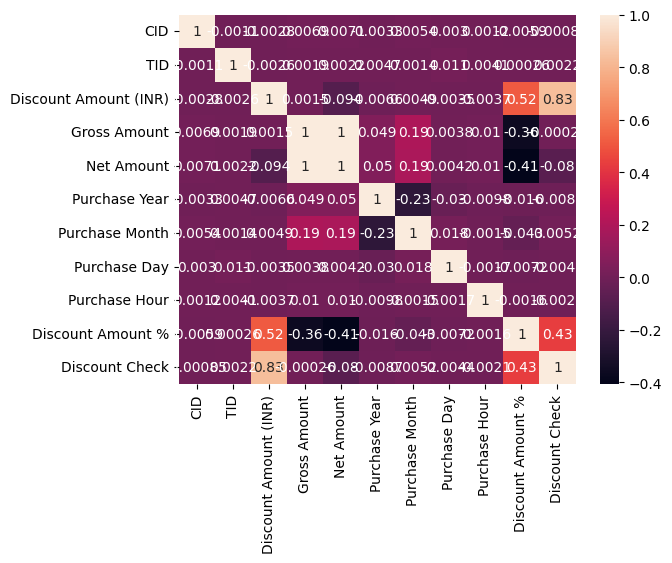

In [35]:
sns.heatmap(corr_df,annot=True)
plt.show()

# Question 1
## Which products generate the most revenue?

In [36]:
df_product = df.groupby('Product Category')['Net Amount'].sum().sort_values(ascending=False)

In [37]:
df_product.head(3)

Product Category
Electronics          4.748257e+07
Clothing             3.122038e+07
Beauty and Health    2.418552e+07
Name: Net Amount, dtype: float64

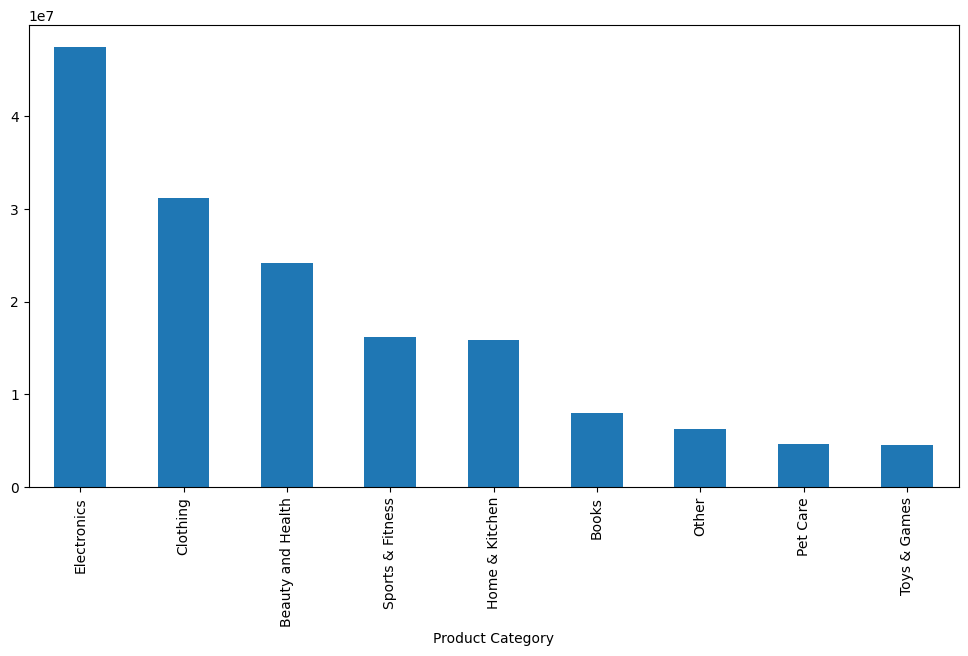

In [38]:
df_product.plot(kind='bar',figsize=(12,6))
plt.show()

# Answer 1
### Electronics has made the most revenue comapred to other products

# Question 2
## What time of day/month/year has the highest purchase frequency?

In [39]:
def categorize_time(hour):
     if 5 <= hour < 12:
        return 'Morning (5-11)'
     elif 12 <= hour < 17:
        return 'Afternoon (12-16)'
     elif 17 <= hour < 21:
        return 'Evening (17-20)'
     else:
        return 'Night (21-4)'

df['Time of Day'] = df['Purchase Hour'].apply(categorize_time)

In [40]:
df.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,...,Location,Purchase Year,Purchase Month,Purchase Month Name,Purchase Day,Purchase Day Name,Purchase Hour,Discount Amount %,Discount Check,Time of Day
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,...,Ahmedabad,2023,8,August,30,Wednesday,20,8.865248,1,Evening (17-20)
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,...,Bangalore,2024,2,February,23,Friday,9,3.776467,1,Morning (5-11)
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,...,Delhi,2022,3,March,6,Sunday,9,10.649563,1,Morning (5-11)
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,No Discount,0.00,5695.612650,...,Delhi,2020,11,November,4,Wednesday,4,0.000000,0,Night (21-4)
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,...,Delhi,2022,5,May,31,Tuesday,17,19.188263,1,Evening (17-20)


In [41]:
df_timeofday = df.groupby('Purchase Year')['Time of Day'].value_counts()
df_timeofday

Purchase Year  Time of Day      
2019           Night (21-4)          962
               Morning (5-11)        884
               Afternoon (12-16)     706
               Evening (17-20)       539
2020           Night (21-4)         3636
               Morning (5-11)       3273
               Afternoon (12-16)    2288
               Evening (17-20)      1893
2021           Night (21-4)         3701
               Morning (5-11)       3143
               Afternoon (12-16)    2310
               Evening (17-20)      1889
2022           Night (21-4)         3634
               Morning (5-11)       3174
               Afternoon (12-16)    2263
               Evening (17-20)      1824
2023           Night (21-4)         3699
               Morning (5-11)       3230
               Afternoon (12-16)    2274
               Evening (17-20)      1819
2024           Night (21-4)         2559
               Morning (5-11)       2377
               Afternoon (12-16)    1640
               Evening (

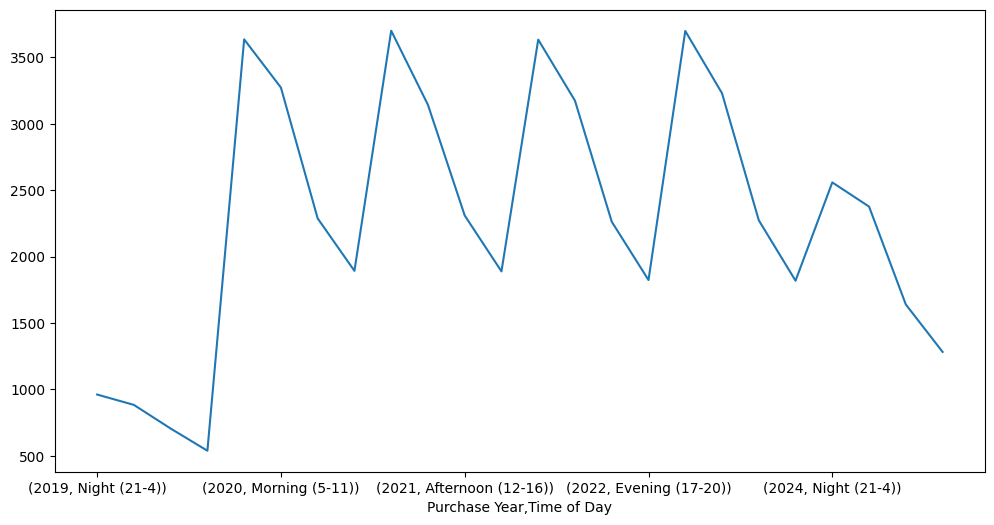

In [42]:
df_timeofday.plot(figsize=(12,6))
plt.show()

In [43]:
df_month = df.groupby('Purchase Year')['Purchase Month Name'].value_counts()
df_month.head(60)

Purchase Year  Purchase Month Name
2019           October                977
               December               909
               November               855
               September              350
2020           March                  981
               August                 947
               November               941
               April                  940
               May                    937
               December               934
               January                928
               September              917
               July                   902
               June                   900
               October                892
               February               871
2021           October                963
               January                960
               December               945
               July                   945
               April                  936
               March                  921
               May                    914

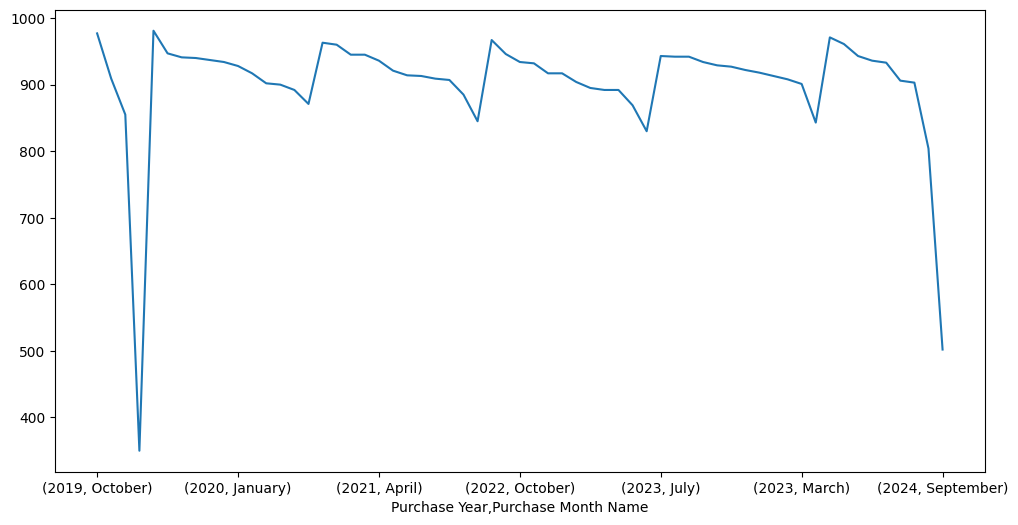

In [44]:
df_month.plot(figsize=(12,6))
plt.show()

In [45]:
df_dayname = df.groupby('Purchase Year')['Purchase Day Name'].value_counts()
df_dayname

Purchase Year  Purchase Day Name
2019           Monday                469
               Saturday              466
               Thursday              444
               Tuesday               432
               Friday                430
               Sunday                428
               Wednesday             422
2020           Thursday             1684
               Wednesday            1636
               Saturday             1599
               Monday               1590
               Sunday               1555
               Tuesday              1529
               Friday               1497
2021           Sunday               1628
               Friday               1620
               Thursday             1599
               Tuesday              1572
               Saturday             1566
               Monday               1559
               Wednesday            1499
2022           Tuesday              1606
               Monday               1569
               Wednesday

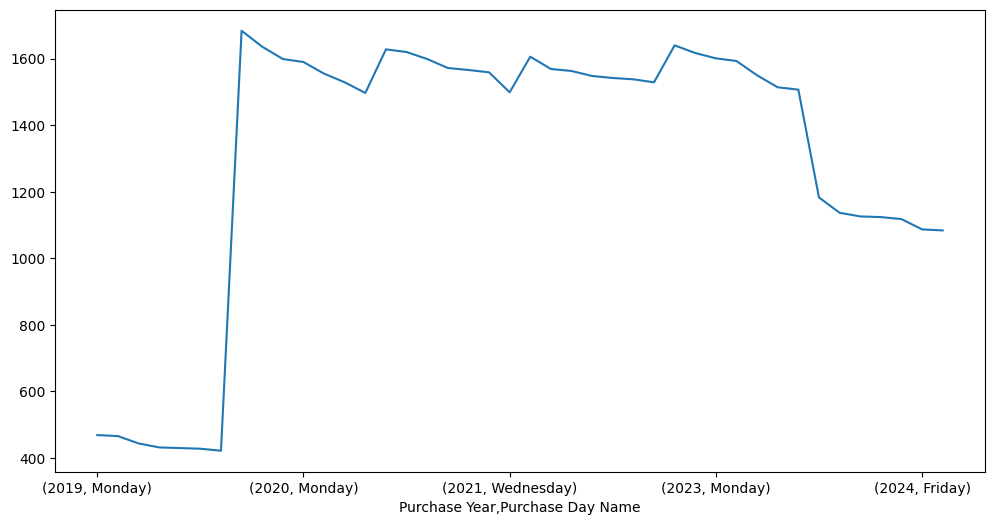

In [46]:
df_dayname.plot(figsize=(12,6))
plt.show()

# Question 3
## How do discounts affect total revenue?

In [47]:
df.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,...,Location,Purchase Year,Purchase Month,Purchase Month Name,Purchase Day,Purchase Day Name,Purchase Hour,Discount Amount %,Discount Check,Time of Day
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,...,Ahmedabad,2023,8,August,30,Wednesday,20,8.865248,1,Evening (17-20)
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,...,Bangalore,2024,2,February,23,Friday,9,3.776467,1,Morning (5-11)
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,...,Delhi,2022,3,March,6,Sunday,9,10.649563,1,Morning (5-11)
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,No Discount,0.00,5695.612650,...,Delhi,2020,11,November,4,Wednesday,4,0.000000,0,Night (21-4)
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,...,Delhi,2022,5,May,31,Tuesday,17,19.188263,1,Evening (17-20)


In [48]:
df_discount = df.pivot_table(index='Purchase Year', columns='Discount Name', values='Net Amount', aggfunc='sum')

In [49]:
df_discount

Discount Name,FESTIVE50,NEWYEARS,No Discount,SAVE10,SEASONALOFFER21,WELCOME5
Purchase Year,,,,,,
2019,7.172220e+05,1.360392e+06,4.938557e+06,7.066500e+05,1.146580e+06,6.713509e+05
2020,2.227598e+06,4.124697e+06,1.524939e+07,2.169431e+06,3.614722e+06,1.940134e+06
2021,2.244485e+06,4.128052e+06,1.614055e+07,2.136106e+06,3.829085e+06,2.204722e+06
2022,2.213263e+06,4.449918e+06,1.690463e+07,2.183397e+06,3.826176e+06,2.320410e+06
2023,2.286012e+06,4.904416e+06,1.774421e+07,2.438363e+06,4.092959e+06,2.373384e+06
2024,1.532410e+06,3.244902e+06,1.214673e+07,1.631309e+06,2.631767e+06,1.703252e+06


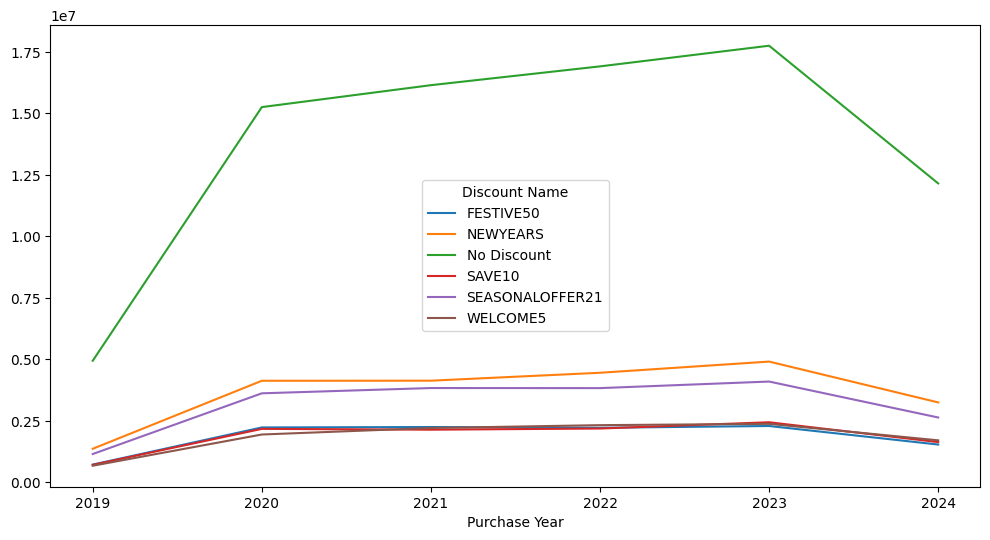

In [58]:
df_discount.plot(figsize=(12,6))
plt.show()

In [54]:
df_discount_sales = df.pivot_table(
    index='Purchase Year',
    columns='Discount Name',
    values='TID',  
    aggfunc='count'
)


In [55]:
df_discount_sales

Discount Name,FESTIVE50,NEWYEARS,No Discount,SAVE10,SEASONALOFFER21,WELCOME5
Purchase Year,,,,,,
2019,241,458,1532,229,401,230
2020,865,1651,5463,884,1404,823
2021,843,1585,5528,819,1432,836
2022,790,1600,5543,781,1368,813
2023,806,1665,5534,830,1385,802
2024,570,1176,3985,572,950,606


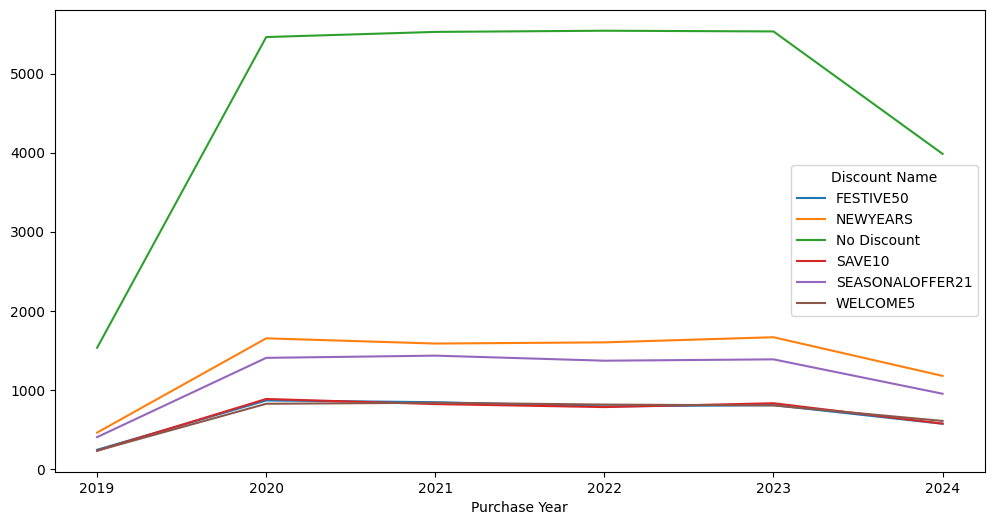

In [57]:
df_discount_sales.plot(figsize=(12,6))
plt.show()

In [59]:
df_discount_sum = df.pivot_table(index='Purchase Year', columns='Discount Name', values='Discount Amount (INR)', aggfunc='sum')

In [61]:
df_discount_sum.drop(columns='No Discount',inplace = True)

In [62]:
df_discount_sum

Discount Name,FESTIVE50,NEWYEARS,SAVE10,SEASONALOFFER21,WELCOME5
Purchase Year,,,,,
2019,65730.95,126994.19,60542.67,107968.17,60338.73
2020,241652.60,449474.79,240916.46,386700.84,232489.56
2021,235596.06,433323.72,224499.19,390109.14,231358.66
2022,219483.33,443050.96,209204.93,376154.69,225437.10
2023,224738.69,460916.02,222804.49,380305.76,223364.76
2024,161654.79,319819.83,154852.76,258562.25,166227.68


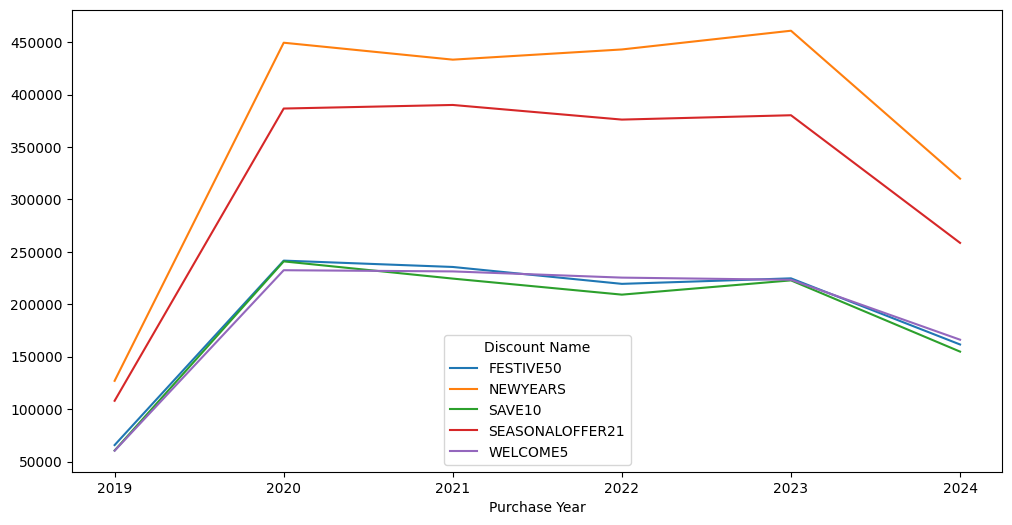

In [63]:
df_discount_sum.plot(figsize=(12,6))
plt.show()

# Answer 3
### Yes During the discount season the reveue has decreased but the most decrease was seen in seasonaloffer21
### And we can see the second best selling season is the NEWYEAR discount season all over 5 years of sales follwed by SEASONALOFFER21 and being the small amount of revenue seen.
### We can see the most discount amount is NEWYEARS season that may be the reason we saw the largest sales from seasons

# Question 4
## Are there purchasing differences between genders or age groups?

In [64]:
df.head(3)

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,...,Location,Purchase Year,Purchase Month,Purchase Month Name,Purchase Day,Purchase Day Name,Purchase Hour,Discount Amount %,Discount Check,Time of Day
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,...,Ahmedabad,2023,8,August,30,Wednesday,20,8.865248,1,Evening (17-20)
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,...,Bangalore,2024,2,February,23,Friday,9,3.776467,1,Morning (5-11)
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,...,Delhi,2022,3,March,6,Sunday,9,10.649563,1,Morning (5-11)


In [65]:
df_gender = df.pivot_table(index='Purchase Year', columns='Gender', values='TID', aggfunc='count')

In [66]:
df_gender

Gender,Female,Male,Other
Purchase Year,,,
2019,1058,980,1053
2020,3698,3630,3762
2021,3743,3645,3655
2022,3635,3640,3620
2023,3693,3625,3704
2024,2627,2576,2656


In [72]:
df_gender_product = df.groupby(['Purchase Year','Gender'])['Product Category'].value_counts()

In [80]:
df_gender_product_pivot=  df.pivot_table(index='Gender', columns='Product Category', values='TID', aggfunc='count')

In [81]:
df_gender_product_pivot

Product Category,Beauty and Health,Books,Clothing,Electronics,Home & Kitchen,Other,Pet Care,Sports & Fitness,Toys & Games
Gender,,,,,,,,,
Female,2811,889,3775,5430,1850,763,559,1862,515
Male,2803,949,3535,5561,1755,689,532,1810,462
Other,2718,924,3658,5583,1884,719,527,1885,552


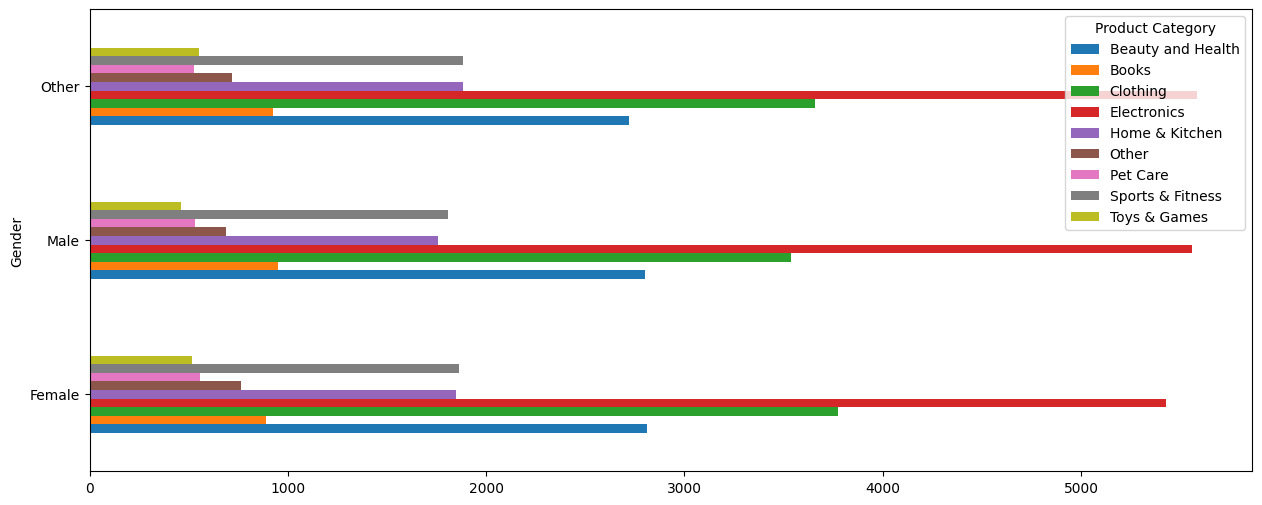

In [84]:
df_gender_product_pivot.plot.barh(figsize=(15,6))
plt.show()

In [85]:
df_age_product_pivot=  df.pivot_table(index='Age Group', columns='Product Category', values='TID', aggfunc='count')

In [86]:
df_age_product_pivot

Product Category,Beauty and Health,Books,Clothing,Electronics,Home & Kitchen,Other,Pet Care,Sports & Fitness,Toys & Games
Age Group,,,,,,,,,
18-25,2523,790,3308,5024,1627,621,491,1588,459
25-45,3296,1099,4367,6624,2223,870,640,2246,645
45-60,1689,574,2218,3297,1071,474,316,1174,291
60 and above,406,144,546,788,266,100,91,279,64
under 18,418,155,529,841,302,106,80,270,70


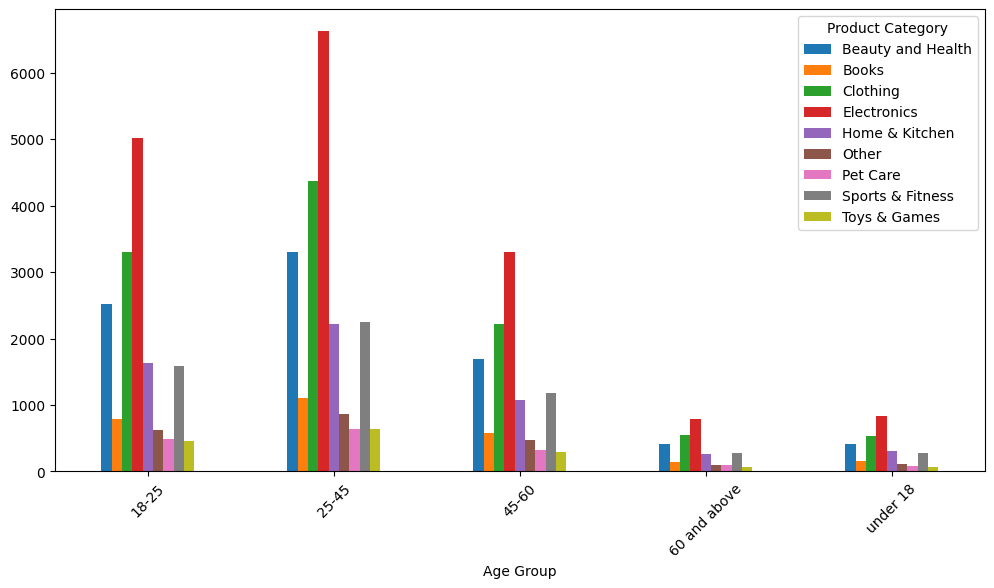

In [93]:
df_age_product_pivot.plot.bar(figsize=(12,6))
plt.xticks(rotation=45)
plt.show()

# Answer 4
### Gender has les effect in purchasing with a little difference
## But Age groups have an effect on how much purchase there was where age group between 25-45 being the most purchasing group followed by 18-25 and under 18 being the least purchasing group

# Question 5
## Which Gender and Age group use the discount and which discount?

In [95]:
df_gender_discount_pivot_table=  df.pivot_table(index='Gender', columns='Discount Name', values='TID', aggfunc='count')

In [97]:
df_gender_discount_pivot_table.drop(columns='No Discount', inplace =True)

In [98]:
df_gender_discount_pivot_table

Discount Name,FESTIVE50,NEWYEARS,SAVE10,SEASONALOFFER21,WELCOME5
Gender,,,,,
Female,1390,2754,1430,2254,1358
Male,1365,2627,1299,2339,1361
Other,1360,2754,1386,2347,1391


In [99]:
df_age_discount_pivot_table=  df.pivot_table(index='Age Group', columns='Discount Name', values='TID', aggfunc='count')
df_age_discount_pivot_table.drop(columns='No Discount', inplace =True)

In [100]:
df_age_discount_pivot_table

Discount Name,FESTIVE50,NEWYEARS,SAVE10,SEASONALOFFER21,WELCOME5
Age Group,,,,,
18-25,1257,2405,1278,2005,1203
25-45,1612,3255,1608,2859,1634
45-60,833,1653,847,1400,849
60 and above,215,418,193,334,195
under 18,198,404,189,342,229


# Answer 5
### Females Customers are the most discount users and also the most purchasers. and the most discount they use is NEWYEARS season discount.
### Interms of Age group we can see the Most discount users are the most purchasing group which is 25-45 Age Group and NEWYEARS discount is the one they used the most.
### The reason we see this is may be because that time is where people give gifts and buy new products to celebrate the new years and christmass season
### I would suggest to get more stock and do more advertising in this season specially for the age group 25-45 and also female but according to analysis gender that play that much role comapre to age group.

## lets export tis file as csv and do more analysis using SQL

In [94]:
df.to_csv('ecommerce_data_cleaned.csv')